<a href="https://colab.research.google.com/github/gpostill/Applied-ML-for-Healthcare-Course-Project/blob/main/Clustering_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Part 2: Clustering with Dummy Data


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

warnings.filterwarnings('ignore')

Importing the dummy dataset created

In [ ]:
#Reading the csv of the file created in the prior desriptive analysis (Not regenerating Dummy data for consistency)
data = pd.read_csv("drive/My Drive/CHL5320_Course_Project/DummyData.csv") #Gemma

#Copying the original dataframe and selecting the columns included in the prediction
df = data.copy()

#Encoding the categorical variables
df = df.replace({"No": 0, "Yes": 1})
df - df.replace({"M": 0, "F": 1})

print("The number of patients included in the model: ")
print(len(df))

#Display dataframe
df.head()

Creating a Dummy Dataset

###Functions for Clustering

In [ ]:
#################################
#Function for Elbow Plot
#################################
def elbow_fxn(cluster_data, plot_name):
  """
  Parameters
  ------------
  cluster_data : DATAFRAME
      DATA FOR CLUSTERING.
  plot_name : STRING
      NAME FOR PLOT TO BE SAVED AS; INCLUDES FILE PATH
  Returns
  -----------
  None. Displays plot in consoles. Saves an image of plot.
  """
  wcss = [] #initializing an empty list to store the within-cluster sum of squares (WCSS) values

  #Tring different values of K (number of clusters)
  for k in range(1,11):
      kmeans = KMeans(n_clusters=k, random_state=0)
      kmeans.fit(cluster_data)
      wcss.append(kmeans.inertia_)

  #Plot the WCSS values for different values of k
  plt.figure(figsize=(8,6))
  plt.plot(range(1,11), wcss, marker='o', linestyle='--')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
  plt.title('Elbow Method')
  plt.savefig(plot_name)
  plt.show()

#################################
#Function that describes clusters
#################################

def describe_clusters(original_data, cluster_data, labels_OF_cluster, csv_name):
  """
  Parameters
  ------------
  original_data : DATAFRAME
      ORIGINAL DATAFRAM WITH ALL COLUMNS (Including those dropped).
  cluster_data : DATAFRAME
      DATA FOR CLUSTERING.
  labels_OF_cluster : NUMPY ARRAY
      CLUSTER LABELS OUTPUTTED BY THE MODEL
  csv_name : STRING
      NAME FOR DESCRIPTIVE DATAFRAME TO BE SAVED AS; INCLUDES FILE PATH
  Returns
  -----------
  None. Displays plot in consoles. Saves an image of plot.
  """
  #Creating a new df for the description of each cluster
  cluster_data['Cluster'] = labels_OF_cluster
  df_cluster_descriptive = cluster_data.copy() #copying the original dataset
  add_to_df = ['Age_death', 'sex', 'Age_Asthma','Age_CHF','Age_COPD','Age_Myocardial_infarction','Age_Hypertension','Age_Arrythmia','Age_CCS','Age_Stroke','Age_Cancer','Age_Dementia',
                'Age_Rental_disease','Age_Diabetes','Age_Osteoporosis','Age_Rheumatoid_Arthritis','Age_Oseo_Arthritis','Age_Mood_disorder','Age_Other_Mental_disorder']

  for column in add_to_df:
       df_cluster_descriptive[column] = original_data[column]

  grouped_data = df_cluster_descriptive.groupby('Cluster')

  #summarizing the clusters
  cluster_statistics = grouped_data.describe()
  cluster_statistics = cluster_statistics.transpose()
  cluster_statistics.to_csv(csv_name)

#################################
#Function that creates a TSNE plot of clusters
#################################

def TSNE_plot(cluster_data, labels_OF_cluster, legend_labels, plot_name):
  """
  Parameters
  ----------
  Note - model requires TSNE() package imported
  cluster_data : DATAFRAME
      DTAA FITTED BY THE MODEL
  plot_name : String
      NAME FOR PLOT TO BE SAVED; INCLUDES FILE PATH
  Returns
  --------
  None. Displays plot in console. Saves an image of plot.
  """
  #Reducing the data with t-SNE
  tsne = TSNE(n_components=2, perplexity=40, random_state=0)
  tsne_result = tsne.fit_transform(cluster_data)

  #Creating a scatter plot of t-SNE results colored by cluster
  plt.figure(figsize=(8,6))
  scatter = plt.scatter(tsne_result[:,0], tsne_result[:,1], c=labels_OF_cluster, cmap='viridis')

  #Adding a legend with custom labels
  legend = plt.legend(*scatter.legend_elements())
  for text, label in zip(legend.get_texts(), legend_labels):
    text.set_text(label)

  #Formatting Axis and Title
  plt.xlabel('t-SNE Dimension 1')
  plt.ylabel('t-SNE Dimension 2')
  plt.title('K-Means Cluster (t-SNE Dimensionality Reduction) Method')

  #Saving and showing figure
  plt.savefig(plot_name)
  plt.show()





In [ ]:
#Subsetting the data to a smaller dataframe for clusterings
df_cluster = df[['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrythmia','CCS','Stroke','Cancer','Dementia',
              'Rental_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Oseo_Arthritis','Mood_disorder','Other_Mental_disorder']]



Running the Kmeans Approach Below

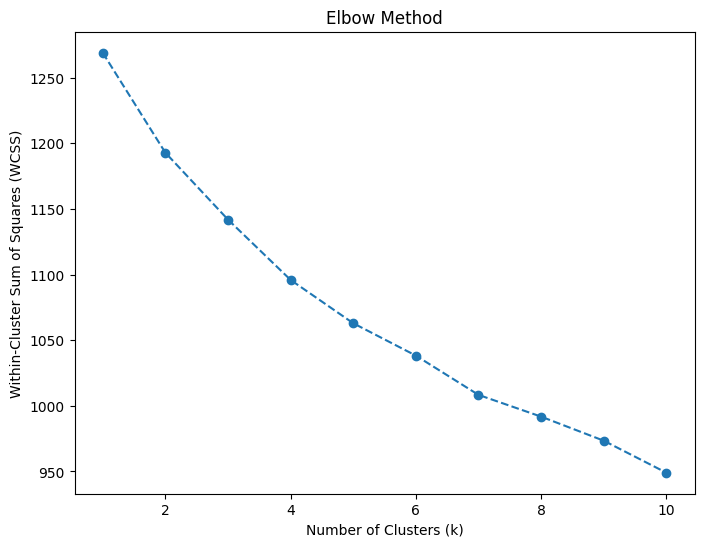

In [ ]:
#ELBOW METHODS TO DETERMINE OPTIMAL CLUSTERS

elbow_fxn(df_cluster, 'Elbow_DummyData.png')



Based on our elbow graph, we have identified 5 as the optimal number of clusters

In [ ]:

#KMEANS WITH OPTIMAL NUMBER OF CLUSTERS: 5

#Fitting the Model
kmeans = KMeans(n_clusters=5, random_state=0) #random_state fixes the environment
cluster_labels = kmeans.fit_predict(df_cluster)

#Describing the clusters
describe_clusters(df, df_cluster, cluster_labels, 'cluster_statistics_DummyData.csv')

#Plotting the clusters
TSNE_plot(df_cluster, cluster_labels, 'tsne_cluster5_DummyData.png')


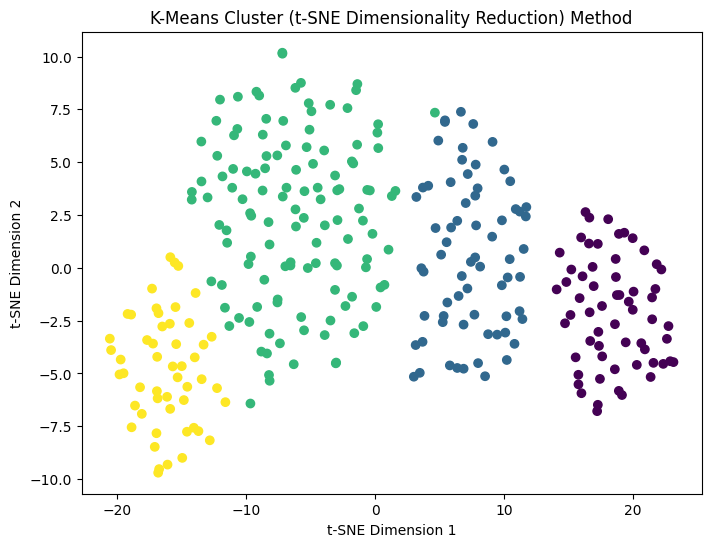

In [ ]:

#KMEANS WITH OPTIMAL NUMBER OF CLUSTERS: 4    (trying 1 below elbow)

#Fitting the Model
kmeans = KMeans(n_clusters=4, random_state=0) #random_state fixes the environment
cluster_labels = kmeans.fit_predict(df_cluster)

#Describing the clusters
describe_clusters(df, df_cluster, cluster_labels, 'cluster4_statistics_DummyData.csv')

#Plotting the clusters
TSNE_plot(df_cluster, cluster_labels, 'tsne_cluster4_DummyData.png')


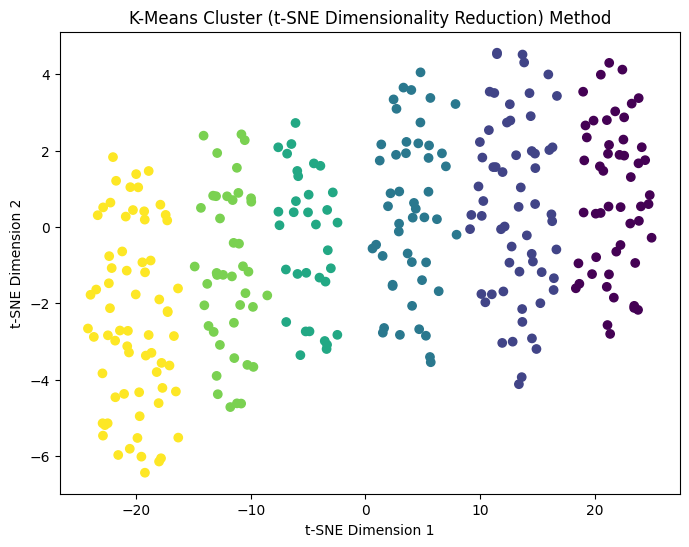

In [ ]:

#KMEANS WITH OPTIMAL NUMBER OF CLUSTERS: 6

#Fitting the Model
kmeans = KMeans(n_clusters=6, random_state=0) #random_state fixes the environment
cluster_labels = kmeans.fit_predict(df_cluster)

#Describing the clusters
describe_clusters(df, df_cluster, cluster_labels, 'cluster6_statistics_DummyData.csv')

#Plotting the clusters
TSNE_plot(df_cluster, cluster_labels, 'tsne_cluster6_DummyData.png')
